This notebook will compare embeddings of data using the unsupervised CEBRA-Time and the supervised CEBRA-Behaviour modes.

In [21]:
! pip install 'cebra[dev,demos]' 

/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: No such file or directory
/Users/brian.gitahi/Desktop/AIND/CEBRA/CEBRA-Analysis/cebraenv/bin/pip: line 2: exec: /Users/brian.gitahi/Desktop/AIND/CEBRA Analysis/CEBRA13/cebraenv/bin/python: cannot execute: No such file or directory


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
import cebra.datasets
from cebra import CEBRA
import d_library as dl
import sklearn.linear_model
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection


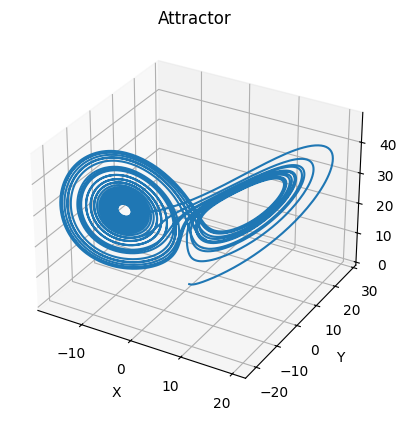

In [23]:
# DATA
xyz = dl.make_lorenz()
dl.plot_lorenz(xyz)

In [24]:
# reshape it
new_lorenz = np.transpose(xyz)

In [25]:
def reconstruction_score(x, y):

    def _linear_fitting(x, y):
        lin_model = sklearn.linear_model.LinearRegression()
        lin_model.fit(x, y)
        return lin_model.score(x, y), lin_model.predict(x)

    return _linear_fitting(x, y)

## CEBRA-Time

In [26]:
# make the model and compute embedding
time_model = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='time',
    output_dimension=3,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

In [27]:
time_model.fit(new_lorenz[:8000])

pos:  3874772144499915227136.0000 neg: -21815517659775975292928.0000 total: -17940745515276060065792.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 96.10it/s] 


CEBRA(batch_size=512, conditional='time', delta=0.1, distance='euclidean',
      learning_rate=0.01, max_iterations=2000,
      model_architecture='offset1-model-mse', num_hidden_units=64,
      output_dimension=3, verbose=True)

In [28]:
time_embedding = time_model.transform(new_lorenz)
time_score, time_transf = reconstruction_score(time_embedding,new_lorenz)

/var/folders/zy/yd8f_r21629f1sr6zfh12jv40000gp/T/ipykernel_24327/1932836217.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(time_transf[:, 0],


linear reconstruction score: 0.9658194215379877


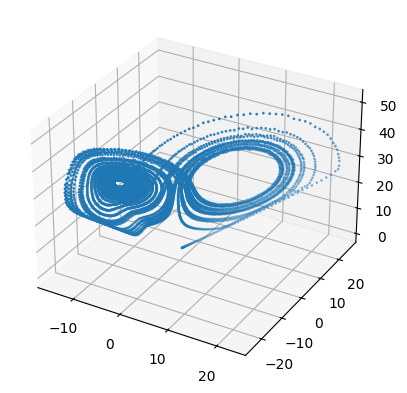

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

print(f"linear reconstruction score: {time_score}")
ax.scatter(time_transf[:, 0],
            time_transf[:, 1],
            time_transf[:,2],
            s=1,
            cmap='cool')

<Axes3D: title={'center': 'Embedding'}>

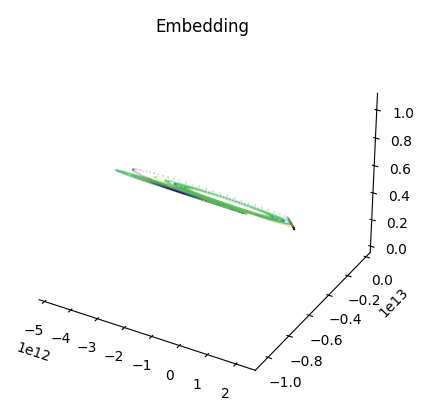

In [30]:
cebra.plot_embedding(time_embedding, embedding_labels='time')

The linear regression improves the quality of the embedding.

## CEBRA-Behaviour

In [31]:
b_label_ = np.arange(0,10000,1)

In [32]:
# make the model and compute embedding
behaviour_model = CEBRA(
    model_architecture="offset1-model-mse",
    batch_size=512,
    learning_rate=0.01,
    max_iterations=2000,
    delta=0.1,
    conditional='time',
    output_dimension=3,
    distance='euclidean',
    device="cuda_if_available",
    num_hidden_units=64,
    verbose=True,
)

In [33]:
behaviour_model.fit(new_lorenz[:8000],b_label_[:8000])

pos: -700309742056112128.0000 neg: -29983405821761878491136.0000 total: -29984106131503934603264.0000 temperature:  1.0000: 100%|██████████| 2000/2000 [00:20<00:00, 95.74it/s]  


CEBRA(batch_size=512, conditional='time', delta=0.1, distance='euclidean',
      learning_rate=0.01, max_iterations=2000,
      model_architecture='offset1-model-mse', num_hidden_units=64,
      output_dimension=3, verbose=True)

In [34]:
behaviour_embedding = behaviour_model.transform(new_lorenz)
behaviour_score, behaviour_transf = reconstruction_score(behaviour_embedding,new_lorenz)

linear reconstruction score: 0.978871933287225


/var/folders/zy/yd8f_r21629f1sr6zfh12jv40000gp/T/ipykernel_24327/896491283.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(behaviour_transf[:, 0],


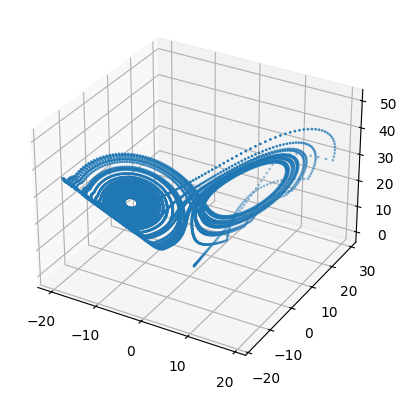

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

print(f"linear reconstruction score: {behaviour_score}")
ax.scatter(behaviour_transf[:, 0],
            behaviour_transf[:, 1],
            behaviour_transf[:,2],
            s=1,
            cmap='cool')

<Axes3D: title={'center': 'Embedding'}>

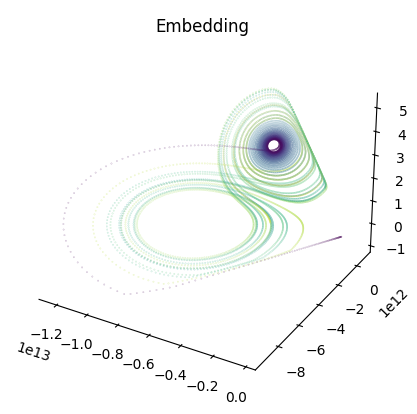

In [36]:
cebra.plot_embedding(behaviour_embedding,embedding_labels='time')

## Summary

Now let's compare both side by side. The reconstruction scores for the CEBRA-Time model is very slightly higher than that of the CEBRA-behaviour model (over repeated runs of this notebook). 

This isn't always clear in the visualization of the embedding depending on what angle you view the embedding. 

So this next part views them at different angles as well.



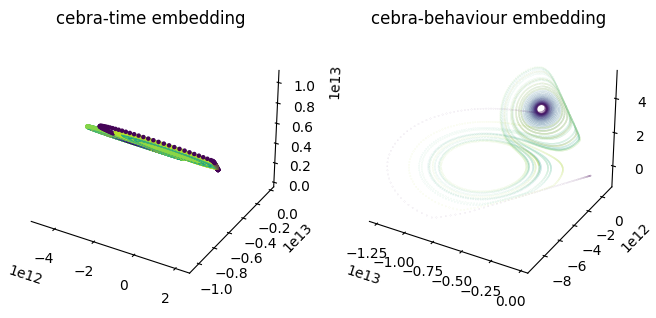

In [37]:
dl.plot_2embeddings(time_embedding,behaviour_embedding, label1='cebra-time embedding', label2='cebra-behaviour embedding')

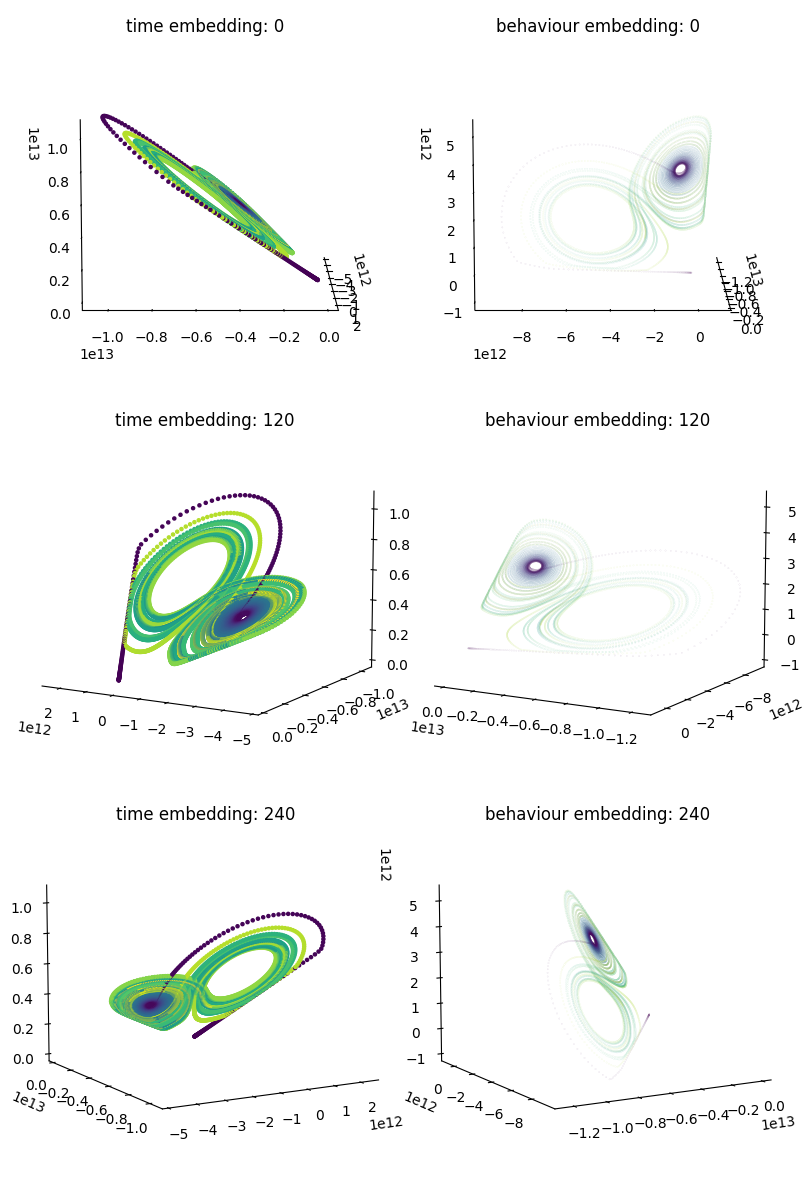

In [38]:
dl.view_embed(time_embedding, behaviour_embedding, label1='time embedding', label2 = 'behaviour embedding')

NEXT STEPS:

- Make a script to make mutliple runs on both modes and compare the reconstruction scores